In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

# Display basic information
print("First 5 rows of the dataset:")
print(iris_df.head())


First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [7]:
## Task 1: List features and their types
print("\nFeatures and their types:")
for feature in iris_df.columns[:-1]:  # Exclude the 'species' column
    print(f"{feature}: Numeric (continuous)")
print("species: Nominal (categorical)")



Features and their types:
sepal length (cm): Numeric (continuous)
sepal width (cm): Numeric (continuous)
petal length (cm): Numeric (continuous)
petal width (cm): Numeric (continuous)
species: Nominal (categorical)


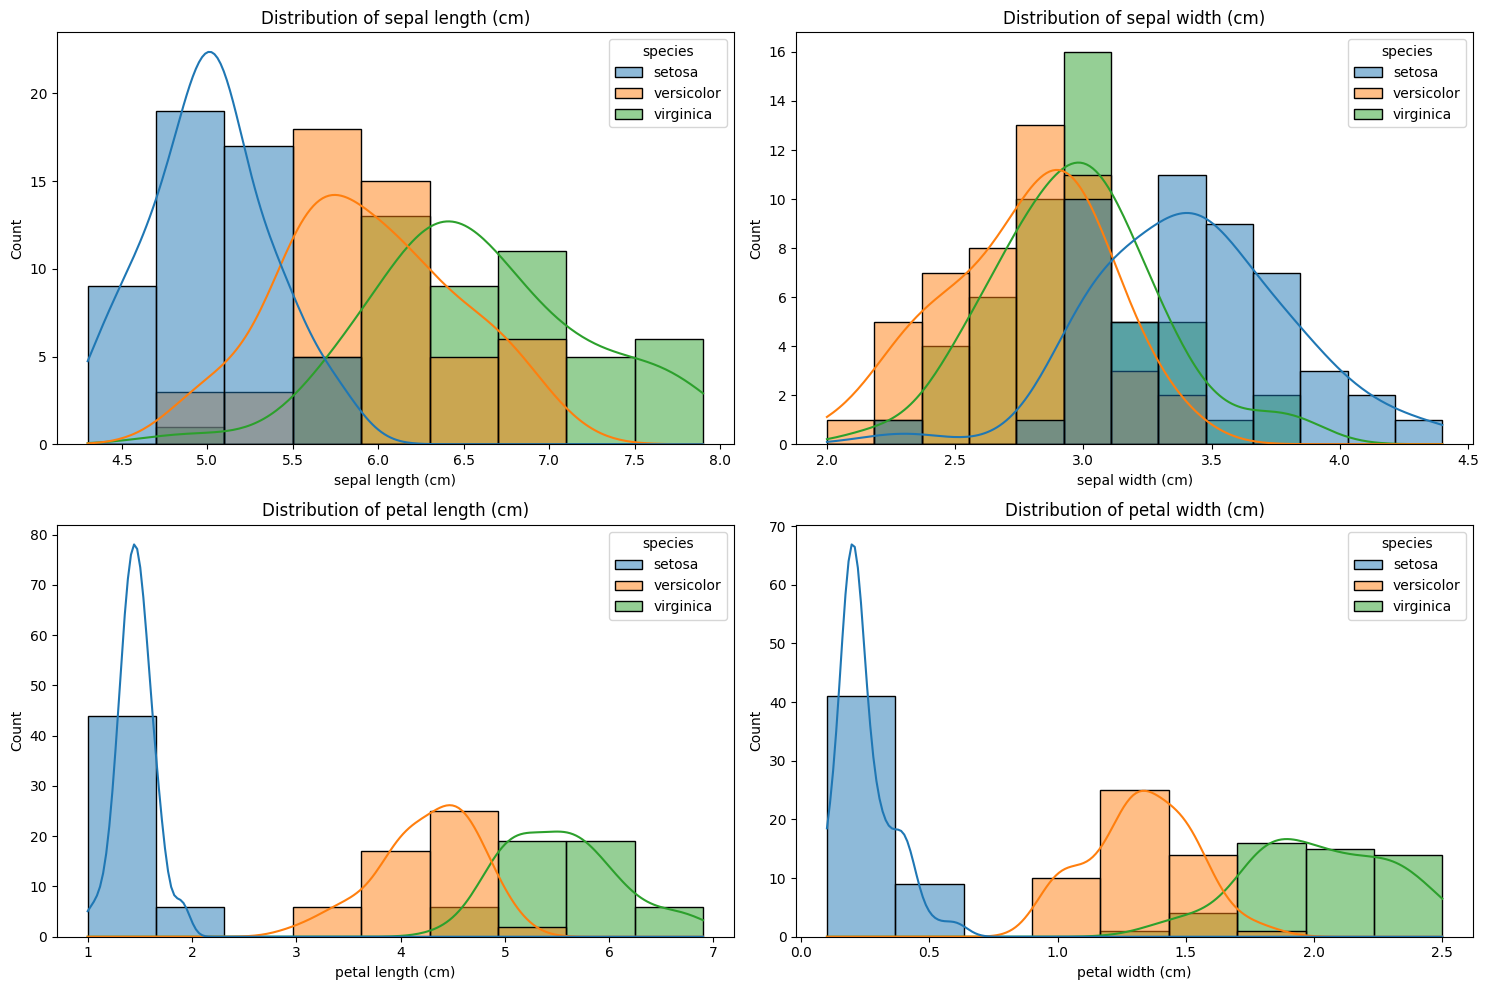

In [8]:
## Task 2: Create histograms for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=iris_df, x=feature, hue='species', kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

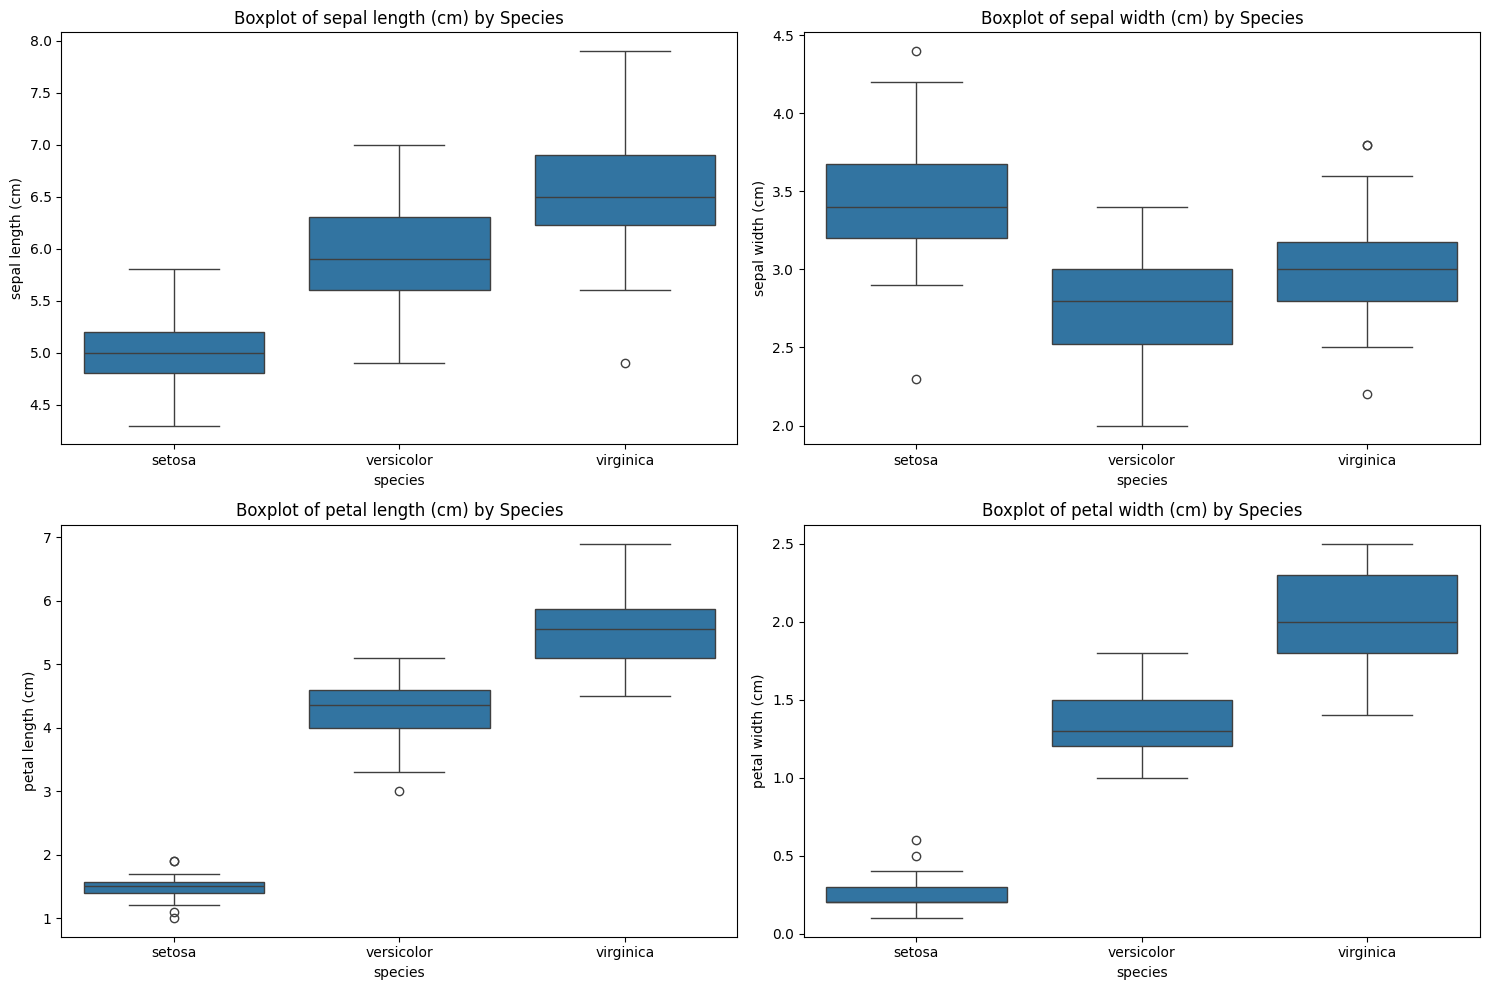

In [3]:
## Task 3: Create boxplots for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=iris_df, x='species', y=feature)
    plt.title(f'Boxplot of {feature} by Species')
plt.tight_layout()
plt.show()


In [10]:
print("\n=== Task 4: Distribution Comparison & Outliers ===")
for feature in iris.feature_names:
    print(f"\n**Feature: {feature}**")
    
    # Summary statistics
    print("\nSummary Statistics:")
    print(iris_df.groupby('species')[feature].describe())
    
    # Detect outliers (using IQR method)
    print("\nOutliers Detection:")
    for species in iris_df['species'].unique():
        subset = iris_df[iris_df['species'] == species][feature]
        Q1 = subset.quantile(0.25)
        Q3 = subset.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
        
        print(f"\n- {species}:")
        if outliers.empty:
            print("  No outliers detected.")
        else:
            print(f"  Outliers: {outliers.values}")


=== Task 4: Distribution Comparison & Outliers ===

**Feature: sepal length (cm)**

Summary Statistics:
            count   mean       std  min    25%  50%  75%  max
species                                                      
setosa       50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8
versicolor   50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0
virginica    50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9

Outliers Detection:

- setosa:
  No outliers detected.

- versicolor:
  No outliers detected.

- virginica:
  Outliers: [4.9]

**Feature: sepal width (cm)**

Summary Statistics:
            count   mean       std  min    25%  50%    75%  max
species                                                        
setosa       50.0  3.428  0.379064  2.3  3.200  3.4  3.675  4.4
versicolor   50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4
virginica    50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8

Outliers Detection:

- setosa:
  Outliers: [4.4 2.3]

- versicolor:
  No outliers det